In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
world_cup_matches = pd.read_csv('WorldCupMatches.csv')
world_cup_players = pd.read_csv('WorldCupPlayers.csv')
world_cup_goals = pd.read_csv('WorldCups.csv')

Analyze the Host Countries:

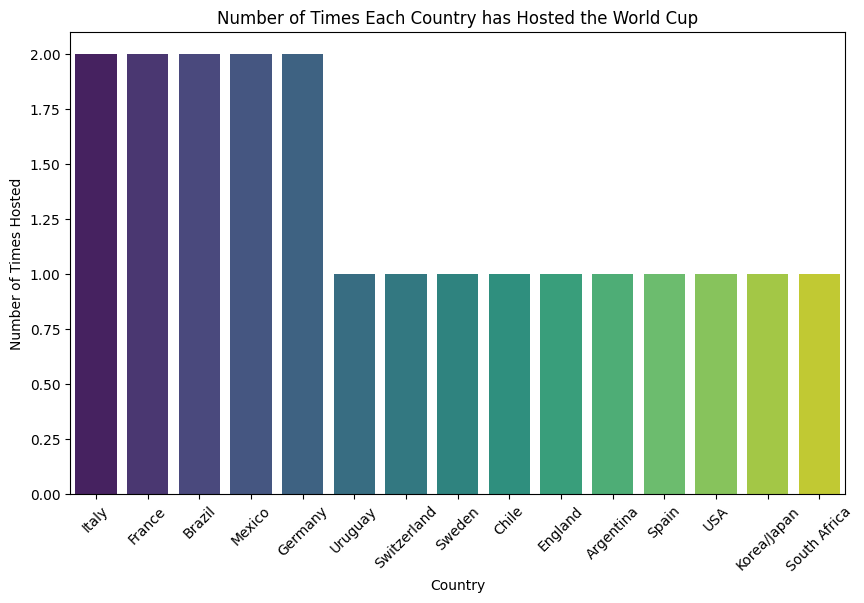

In [26]:
# Count the number of times each country has hosted the World Cup
host_counts = world_cup_goals['Country'].value_counts()

# Visualize the hosts using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=host_counts.index, y=host_counts.values, palette='viridis')
plt.title('Number of Times Each Country has Hosted the World Cup')
plt.xlabel('Country')
plt.ylabel('Number of Times Hosted')
plt.xticks(rotation=45)
plt.show()

Analyze the Finalists:

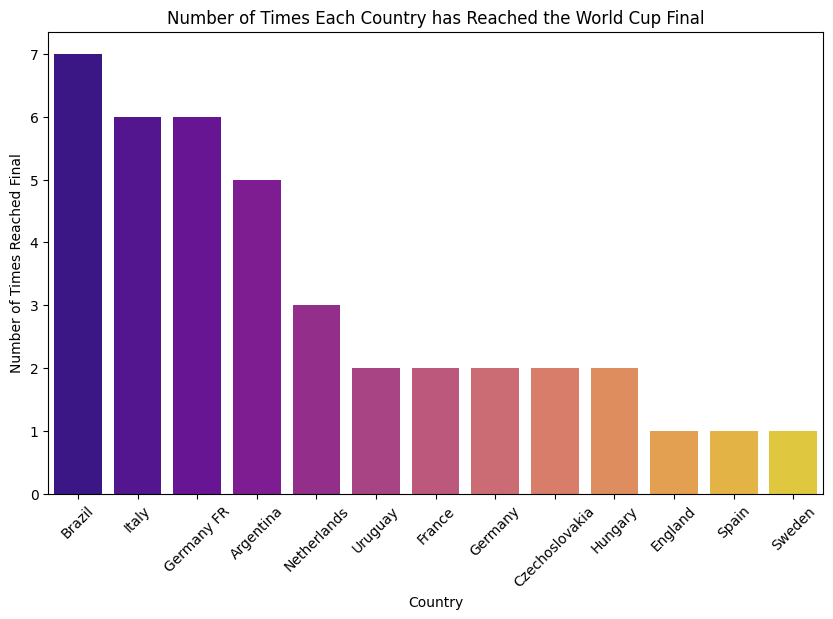

In [27]:
# Combine the winners and runners-up columns to get a list of finalists
finalists = pd.concat([world_cup_goals['Winner'], world_cup_goals['Runners-Up']])

# Count the number of times each country has reached the final
finalist_counts = finalists.value_counts()

# Visualize the finalists using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=finalist_counts.index, y=finalist_counts.values, palette='plasma')
plt.title('Number of Times Each Country has Reached the World Cup Final')
plt.xlabel('Country')
plt.ylabel('Number of Times Reached Final')
plt.xticks(rotation=45)
plt.show()

Analyze the Matches Played:

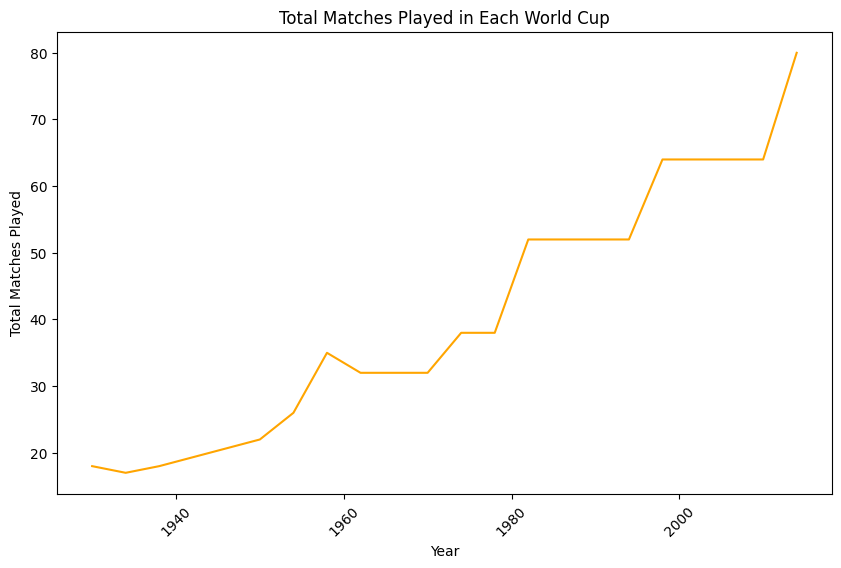

In [29]:
# Calculate the total matches played in each World Cup
matches_per_cup = world_cup_matches.groupby('Year')['MatchID'].count()

# Visualize the matches played using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=matches_per_cup.index, y=matches_per_cup.values, color='orange')
plt.title('Total Matches Played in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45)
plt.show()

Analyze the Goal Scorers:

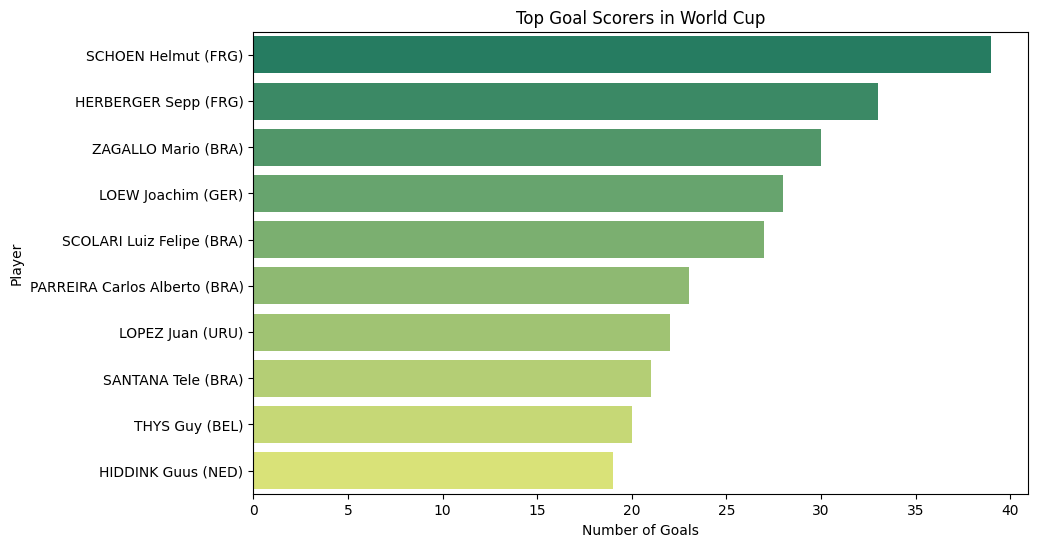

In [31]:
# Extract the goal scorers from the events column in players_df
goal_scorers =world_cup_players[world_cup_players['Event'].str.startswith('G', na=False)]

# Count the number of goals scored by each player
top_scorers = goal_scorers['Coach Name'].value_counts().nlargest(10)

# Visualize the top goal scorers using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='summer')
plt.title('Top Goal Scorers in World Cup')
plt.xlabel('Number of Goals')
plt.ylabel('Player')
plt.show()

Analyze the Attendance

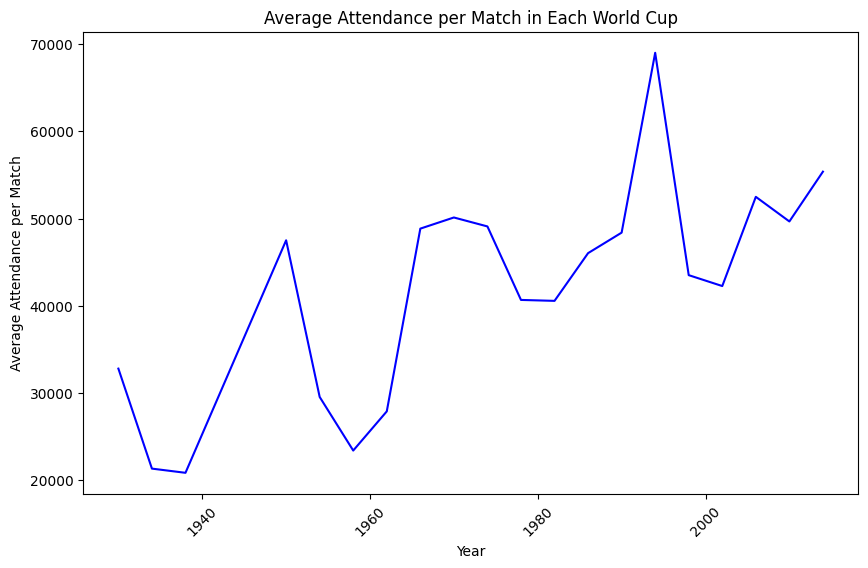

In [32]:
# Calculate the average attendance per match in each World Cup
avg_attendance_per_cup = world_cup_matches.groupby('Year')['Attendance'].mean()

# Visualize the average attendance using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_attendance_per_cup.index, y=avg_attendance_per_cup.values, color='blue')
plt.title('Average Attendance per Match in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Average Attendance per Match')
plt.xticks(rotation=45)
plt.show()

Analyze the Stadiums:

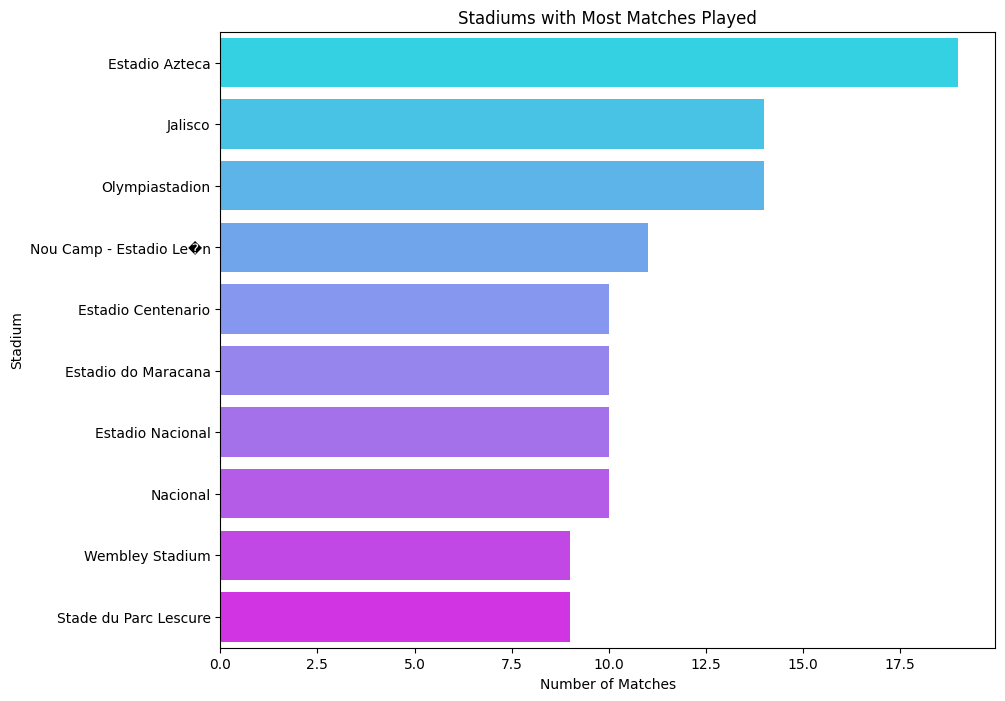

In [33]:
# Count the number of matches played in each stadium
matches_per_stadium = world_cup_matches['Stadium'].value_counts()

# Visualize the stadiums with most matches using a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=matches_per_stadium.values[:10], y=matches_per_stadium.index[:10], palette='cool')
plt.title('Stadiums with Most Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Stadium')
plt.show()

Analyze the Player Positions:

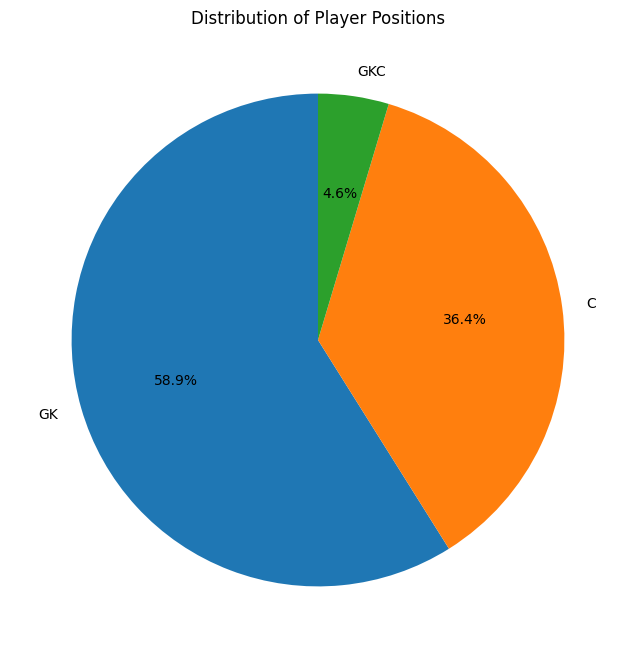

In [34]:
# Count the number of players in each position
player_positions = world_cup_players['Position'].value_counts()

# Visualize the player positions using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(player_positions.values, labels=player_positions.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Player Positions')
plt.show()

Analyze the Coaches:

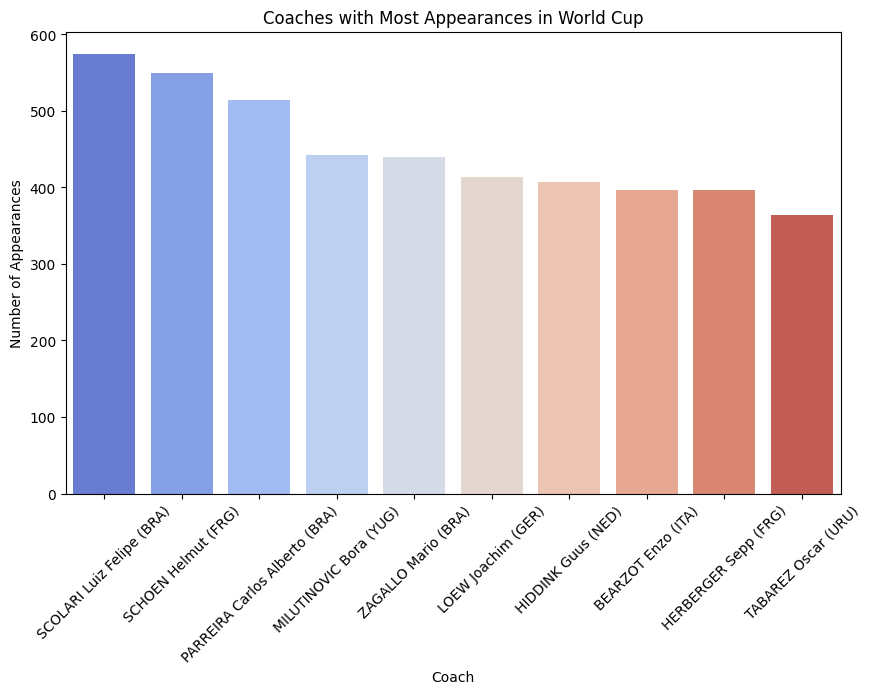

In [36]:
# Count the number of times each coach has appeared in the World Cup
coach_counts = world_cup_players['Coach Name'].value_counts()

# Visualize the coaches with most appearances using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=coach_counts.index[:10], y=coach_counts.values[:10], palette='coolwarm')
plt.title('Coaches with Most Appearances in World Cup')
plt.xlabel('Coach')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.show()

Analyze the Distribution of Goals Scored:

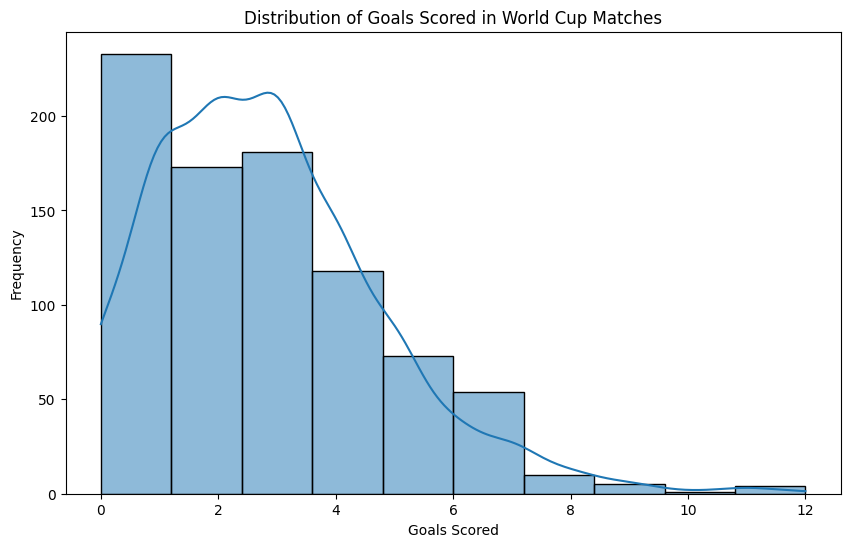

In [40]:
# Create a histogram to show the distribution of goals scored in the World Cup matches
plt.figure(figsize=(10, 6))
sns.histplot(world_cup_matches['Home Team Goals'] + world_cup_matches['Away Team Goals'], bins=10, kde=True)
plt.title('Distribution of Goals Scored in World Cup Matches')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.show()

Analyze the Performance of Teams in the World Cup:

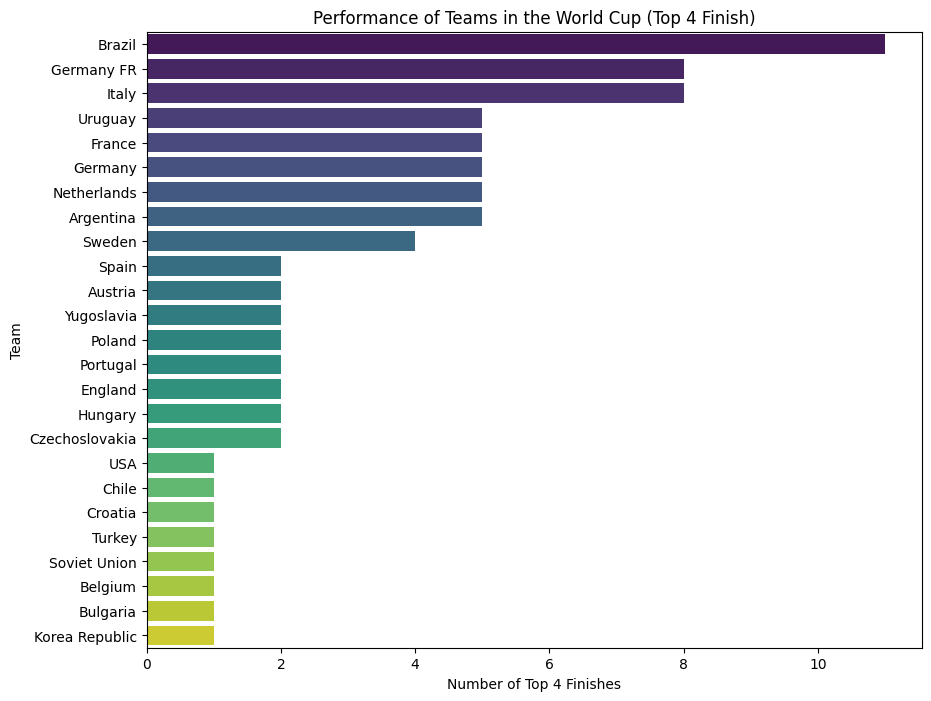

In [41]:
# Calculate the number of times each team has reached the top 4 in the World Cup
top_4_teams = pd.concat([world_cup_goals['Winner'], world_cup_goals['Runners-Up'], world_cup_goals['Third'], world_cup_goals['Fourth']])
top_4_teams_count = top_4_teams.value_counts()

# Visualize the performance of teams using a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_4_teams_count.values, y=top_4_teams_count.index, palette='viridis')
plt.title('Performance of Teams in the World Cup (Top 4 Finish)')
plt.xlabel('Number of Top 4 Finishes')
plt.ylabel('Team')
plt.show()

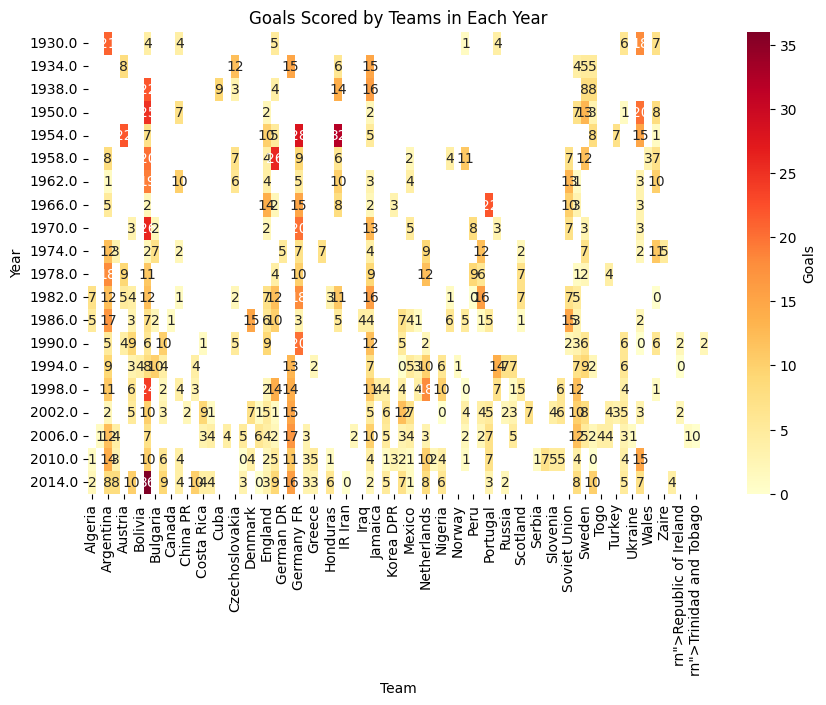

In [58]:
# Concatenate the 'Home Team Goals' and 'Away Team Goals' columns into a single 'Goals' column
world_cup_matches['Goals'] = world_cup_matches['Home Team Goals'] + world_cup_matches['Away Team Goals']

# Create a pivot table to get the goals scored by each team in each year
goals_pivot = pd.pivot_table(world_cup_matches, values='Goals', index='Year', columns='Home Team Name', aggfunc='sum')

# Create a heatmap to visualize the goals scored by each team in each year
plt.figure(figsize=(10, 6))  # Adjust the size of the heatmap
sns.heatmap(data=goals_pivot, cmap='YlOrRd', annot=True, fmt='g', cbar=True, cbar_kws={'label': 'Goals'})  # Adjust the color map and add a colorbar label
plt.title('Goals Scored by Teams in Each Year')
plt.xlabel('Team')
plt.ylabel('Year')
plt.show()